In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor

In [2]:
### Read data
train_df = PandasTools.LoadSDF("data/TR_AOH_516.sdf")
test_df = PandasTools.LoadSDF("data/TST_AOH_176.sdf")

In [3]:
### Concatenate data
AOH = pd.concat([train_df[["Canonical_QSARr", "LogOH"]],
                 test_df[["Canonical_QSARr", "LogOH"]]], ignore_index = True)
AOH['LogOH'] = pd.to_numeric(AOH['LogOH'])

In [4]:
### Calculate features
nms = [x[0] for x in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
for i in range(len(AOH)):
    descrs = calc.CalcDescriptors(Chem.MolFromSmiles(AOH.iloc[i, 0]))
    for x in range(len(descrs)):
        AOH.at[i, str(nms[x])] = descrs[x]
AOH = AOH.dropna()

In [5]:
AOH.sample(5).head()

Canonical_QSARr      LogOH  MaxEStateIndex  MinEStateIndex  \
5              CN(C)N=O -11.596879        9.180556        1.194444   
619   CC(C)C1CC=C(C)CC1  -9.896196        2.410880        0.879028   
429  CC(C)O[N+]([O-])=O -12.309804        9.393056       -0.800926   
212         CC(C)(O)C=C -10.188425        8.708333       -0.694444   
131     Cc1cc(C)c(O)cc1 -10.145694        9.043704        0.375556   

     MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  \
5             9.180556           1.194444  0.329191   74.083          68.035   
619           2.410880           0.879028  0.487135  138.254         120.110   
429           9.393056           0.324074  0.381421  105.093          98.037   
212           8.708333           0.694444  0.470778   86.134          76.054   
131           9.043704           0.375556  0.557704  122.167         112.087   

     ExactMolWt  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
5     74.048013  ...         0.0           0.0         0.0                0.0   
619  138.140851  ...         0.0           0.0         0.0                0.0   
429  105.042593  ...         0.0           0.0         0.0                0.0   
212   86.073165  ...         0.0           0.0         0.0                0.0   
131  122.073165  ...         0.0           0.0         0.0                0.0   

     fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
5             0.0          0.0          0.0           0.0               0.0   
619           0.0          0.0          0.0           0.0               0.0   
429           0.0          0.0          0.0           0.0               0.0   
212           0.0          0.0          0.0           0.0               0.0   
131           0.0          0.0          0.0           0.0               0.0   

     fr_urea  
5        0.0  
619      0.0  
429      0.0  
212      0.0  
131      0.0  

[5 rows x 202 columns]

In [7]:
AOH.columns.tolist()

['Canonical_QSARr',
 'LogOH',
 'MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA8',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_V

In [8]:
AOH.shape

(691, 202)

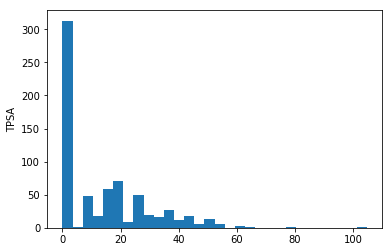

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(AOH['TPSA'], bins=30)
plt.ylabel('TPSA');

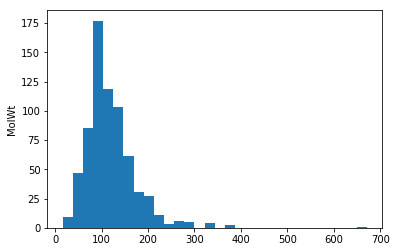

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(AOH['MolWt'], bins=30)
plt.ylabel('MolWt');

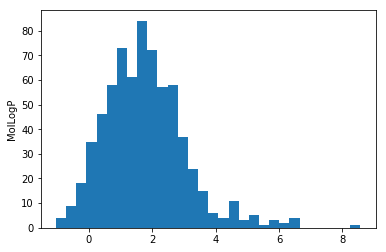

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(AOH['MolLogP'], bins=30)
plt.ylabel('MolLogP');

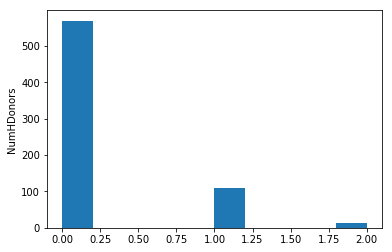

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(AOH['NumHDonors'], bins=10)
plt.ylabel('NumHDonors');